In [334]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [335]:
df=web.DataReader('AAPL',data_source='yahoo',start='2018-1-1',end='2022-05-5')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.075401
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.068253
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.259018
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.728756
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.573772
...,...,...,...,...,...,...
2022-04-29,166.199997,157.250000,161.839996,157.649994,131587100.0,157.418701
2022-05-02,158.229996,153.270004,156.710007,157.960007,123055300.0,157.728256
2022-05-03,160.710007,156.320007,158.149994,159.479996,88966500.0,159.246017


In [336]:
df.shape

(1094, 6)

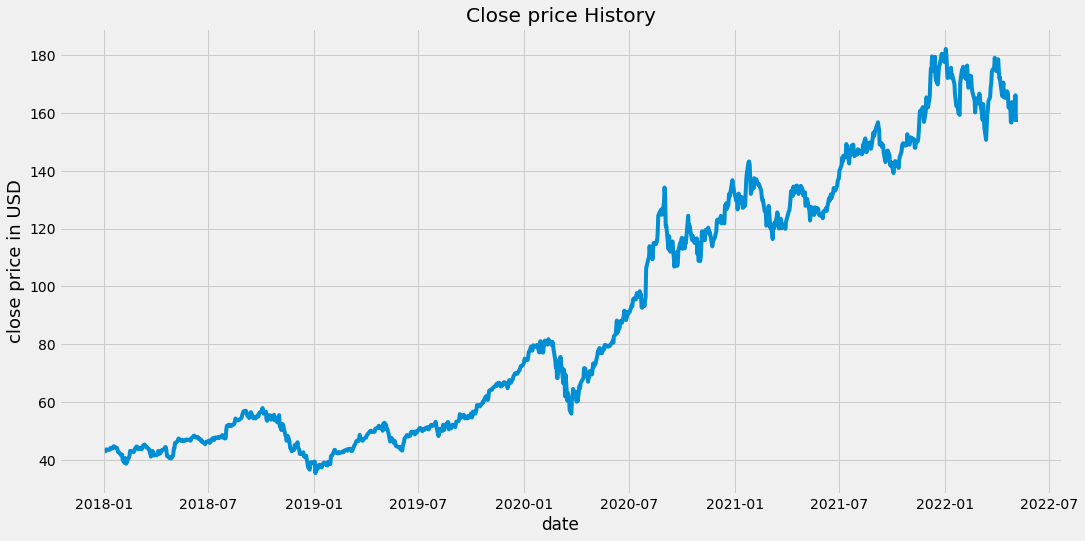

In [337]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Close price History')
plt.xlabel('date')
plt.ylabel('close price in USD',fontsize=18)
plt.show()

In [338]:
dataset=df.filter(['Close']).values
dataset

array([[ 43.06499863],
       [ 43.05749893],
       [ 43.25749969],
       ...,
       [159.47999573],
       [166.02000427],
       [156.77000427]])

In [339]:
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

876

In [340]:
 #scale the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)
scaled_data

array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.84617223],
       [0.89082536],
       [0.82766926]])

In [341]:
train_data=scaled_data[0:training_data_len,:]
print(len(train_data))
X_train=[]
y_train=[]
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(X_train)
        print(y_train)

876
[array([0.05132712, 0.05127591, 0.05264146, 0.05600409, 0.05489461,
       0.05486046, 0.05479217, 0.05648203, 0.05957155, 0.05803534,
       0.06300248, 0.06327557, 0.06191006, 0.05941794, 0.0594862 ,
       0.0546727 , 0.04936417, 0.05004693, 0.04398738, 0.04229752,
       0.04308269, 0.04368012, 0.03125373, 0.02440898, 0.03557224,
       0.02961507, 0.02212169, 0.02427243, 0.03502604, 0.0378083 ,
       0.04298027, 0.05257319, 0.05161729, 0.0506273 , 0.04929591,
       0.05173679, 0.05685756, 0.06278058, 0.06179056, 0.06132968,
       0.05600409, 0.05806948, 0.0591107 , 0.05885465, 0.0560553 ,
       0.05931553, 0.06450456, 0.06747461, 0.0644875 , 0.06187591,
       0.06223435, 0.06115901, 0.05651618, 0.05641377, 0.04963728,
       0.04550654, 0.03883247, 0.05219767, 0.04463599, 0.04146112])]
[0.04368011846769615]


In [342]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.051327,0.051276,0.052641,0.056004,0.054895,0.054860,0.054792,0.056482,0.059572,0.058035,...,0.062234,0.061159,0.056516,0.056414,0.049637,0.045507,0.038832,0.052198,0.044636,0.041461
1,0.051276,0.052641,0.056004,0.054895,0.054860,0.054792,0.056482,0.059572,0.058035,0.063002,...,0.061159,0.056516,0.056414,0.049637,0.045507,0.038832,0.052198,0.044636,0.041461,0.043680
2,0.052641,0.056004,0.054895,0.054860,0.054792,0.056482,0.059572,0.058035,0.063002,0.063276,...,0.056516,0.056414,0.049637,0.045507,0.038832,0.052198,0.044636,0.041461,0.043680,0.041802
3,0.056004,0.054895,0.054860,0.054792,0.056482,0.059572,0.058035,0.063002,0.063276,0.061910,...,0.056414,0.049637,0.045507,0.038832,0.052198,0.044636,0.041461,0.043680,0.041802,0.044721
4,0.054895,0.054860,0.054792,0.056482,0.059572,0.058035,0.063002,0.063276,0.061910,0.059418,...,0.049637,0.045507,0.038832,0.052198,0.044636,0.041461,0.043680,0.041802,0.044721,0.050218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0.577230,0.580644,0.584877,0.586106,0.575932,0.591295,0.597098,0.616899,0.619015,0.630554,...,0.616830,0.616899,0.622634,0.625297,0.618332,0.626799,0.648169,0.642434,0.645916,0.657114
812,0.580644,0.584877,0.586106,0.575932,0.591295,0.597098,0.616899,0.619015,0.630554,0.647350,...,0.616899,0.622634,0.625297,0.618332,0.626799,0.648169,0.642434,0.645916,0.657114,0.648033
813,0.584877,0.586106,0.575932,0.591295,0.597098,0.616899,0.619015,0.630554,0.647350,0.665375,...,0.622634,0.625297,0.618332,0.626799,0.648169,0.642434,0.645916,0.657114,0.648033,0.660596
814,0.586106,0.575932,0.591295,0.597098,0.616899,0.619015,0.630554,0.647350,0.665375,0.653358,...,0.625297,0.618332,0.626799,0.648169,0.642434,0.645916,0.657114,0.648033,0.660596,0.672066


In [343]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train.shape

(816, 60)

In [344]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(816, 60, 1)

In [345]:
X_train

array([[[0.05132712],
        [0.05127591],
        [0.05264146],
        ...,
        [0.05219767],
        [0.04463599],
        [0.04146112]],

       [[0.05127591],
        [0.05264146],
        [0.05600409],
        ...,
        [0.04463599],
        [0.04146112],
        [0.04368012]],

       [[0.05264146],
        [0.05600409],
        [0.05489461],
        ...,
        [0.04146112],
        [0.04368012],
        [0.04180249]],

       ...,

       [[0.58487669],
        [0.58610567],
        [0.57593244],
        ...,
        [0.65711357],
        [0.64803284],
        [0.66059576]],

       [[0.58610567],
        [0.57593244],
        [0.59129473],
        ...,
        [0.64803284],
        [0.66059576],
        [0.67206622]],

       [[0.57593244],
        [0.59129473],
        [0.59709825],
        ...,
        [0.66059576],
        [0.67206622],
        [0.67015448]]])

In [346]:
y_train.shape

(816,)

In [347]:
# build LSTM model
from keras.layers import LSTM,Dense
model=keras.models.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1 )))
model.add(LSTM(50,return_sequences=False))
model.add(keras.layers.Dense(25 ))
model.add(keras.layers.Dense(1))

In [348]:
model.compile(optimizer='adam',loss='mse')

In [349]:
model.fit(X_train,y_train,epochs=1,batch_size=1)

816/816 [==============================] - 37s 40ms/step - loss: 0.0017


In [350]:
# create the test dataset 814-874
test_data=scaled_data[training_data_len-60:,:]
X_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])
    

In [351]:
X_test,y_test=np.array(X_test),np.array(y_test)
X_test.shape,y_test.shape

((218, 60), (218, 1))

In [352]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.591295,0.597098,0.616899,0.619015,0.630554,0.647350,0.665375,0.653358,0.675139,0.658752,...,0.626799,0.648169,0.642434,0.645916,0.657114,0.648033,0.660596,0.672066,0.670154,0.668174
1,0.597098,0.616899,0.619015,0.630554,0.647350,0.665375,0.653358,0.675139,0.658752,0.675617,...,0.648169,0.642434,0.645916,0.657114,0.648033,0.660596,0.672066,0.670154,0.668174,0.666126
2,0.616899,0.619015,0.630554,0.647350,0.665375,0.653358,0.675139,0.658752,0.675617,0.673295,...,0.642434,0.645916,0.657114,0.648033,0.660596,0.672066,0.670154,0.668174,0.666126,0.677528
3,0.619015,0.630554,0.647350,0.665375,0.653358,0.675139,0.658752,0.675617,0.673295,0.677938,...,0.645916,0.657114,0.648033,0.660596,0.672066,0.670154,0.668174,0.666126,0.677528,0.688111
4,0.630554,0.647350,0.665375,0.653358,0.675139,0.658752,0.675617,0.673295,0.677938,0.666126,...,0.657114,0.648033,0.660596,0.672066,0.670154,0.668174,0.666126,0.677528,0.688111,0.692413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.957873,0.937800,0.934318,0.929334,0.950977,0.960877,0.932474,0.908714,0.910353,0.937049,...,0.885841,0.884339,0.900247,0.899087,0.893556,0.861944,0.869386,0.827874,0.826304,0.874575
214,0.937800,0.934318,0.929334,0.950977,0.960877,0.932474,0.908714,0.910353,0.937049,0.935410,...,0.884339,0.900247,0.899087,0.893556,0.861944,0.869386,0.827874,0.826304,0.874575,0.833678
215,0.934318,0.929334,0.950977,0.960877,0.932474,0.908714,0.910353,0.937049,0.935410,0.910353,...,0.900247,0.899087,0.893556,0.861944,0.869386,0.827874,0.826304,0.874575,0.833678,0.835794
216,0.929334,0.950977,0.960877,0.932474,0.908714,0.910353,0.937049,0.935410,0.910353,0.899565,...,0.899087,0.893556,0.861944,0.869386,0.827874,0.826304,0.874575,0.833678,0.835794,0.846172


In [353]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(218, 60, 1)

In [354]:
predictions=model.predict(X_test)

In [355]:
predictions=scalar.inverse_transform(predictions)

In [356]:
predictions

array([[130.76   ],
       [131.14421],
       [131.58464],
       [132.1429 ],
       [132.75241],
       [133.35204],
       [134.14217],
       [135.12366],
       [136.33109],
       [137.38297],
       [138.44405],
       [139.32738],
       [140.14763],
       [141.17819],
       [142.11256],
       [142.71149],
       [142.7235 ],
       [142.8297 ],
       [142.86009],
       [142.99014],
       [143.31067],
       [143.71886],
       [143.91434],
       [143.83456],
       [143.70433],
       [143.57452],
       [143.4226 ],
       [143.45395],
       [143.5167 ],
       [143.60469],
       [143.60788],
       [143.5729 ],
       [143.47559],
       [143.38623],
       [143.59697],
       [143.92786],
       [144.4793 ],
       [144.9782 ],
       [145.04497],
       [144.95909],
       [144.9418 ],
       [145.09003],
       [145.28258],
       [145.35898],
       [145.3037 ],
       [145.29686],
       [145.73616],
       [146.18669],
       [146.67833],
       [147.24377],


In [357]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

5.336790452309705

In [358]:
predictions[0]

array([130.76], dtype=float32)

In [359]:
y_test[0]

array([133.11000061])

In [360]:
train_plot=df[:training_data_len]
valid_plot=df[training_data_len:]
valid_plot['predictions']=predictions

C:\Users\user\AppData\Local\Temp/ipykernel_11164/2149360533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_plot['predictions']=predictions


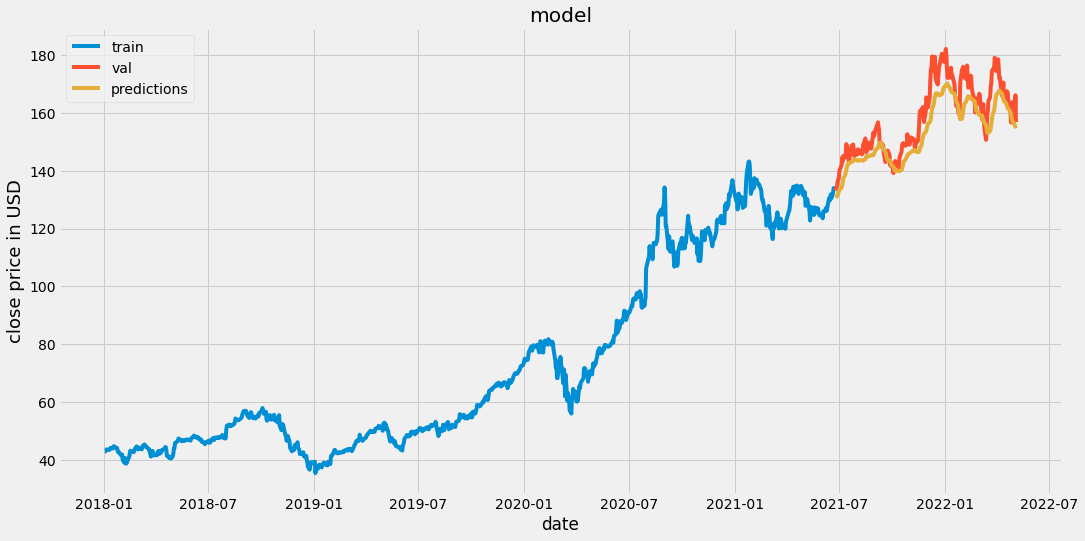

In [361]:
plt.figure(figsize=(16,8))
plt.plot(train_plot['Close'])
plt.plot(valid_plot[['Close','predictions']])
plt.title('model')
plt.xlabel('date')
plt.ylabel('close price in USD',fontsize=18)
plt.legend(['train','val','predictions'])
plt.show()

In [362]:
valid_plot

,High,Low,Open,Close,Volume,Adj Close,predictions
Date,,,,,,,
2021-06-25,133.889999,132.809998,133.460007,133.110001,70783700.0,132.353836,130.759995
2021-06-28,135.250000,133.350006,133.410004,134.779999,62111300.0,134.014343,131.144211
2021-06-29,136.490005,134.350006,134.800003,136.330002,64556100.0,135.555527,131.584641
2021-06-30,137.410004,135.869995,136.169998,136.960007,63261400.0,136.181961,132.142899
2021-07-01,137.330002,135.759995,136.600006,137.270004,52485800.0,136.490204,132.752411
...,...,...,...,...,...,...,...
2022-04-29,166.199997,157.250000,161.839996,157.649994,131587100.0,157.418701,156.940338
2022-05-02,158.229996,153.270004,156.710007,157.960007,123055300.0,157.728256,156.224472
2022-05-03,160.710007,156.320007,158.149994,159.479996,88966500.0,159.246017,155.570374


In [363]:
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2018-1-1',end='2022-05-5')
new_df=apple_quote.filter(['Close'])

In [364]:
new_df

,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502
...,...
2022-04-29,157.649994
2022-05-02,157.960007
2022-05-03,159.479996


In [365]:
# last 60 days of closing 
last_60_values=new_df[-60:].values
last_60_values_scaled=scalar.transform(last_60_values)


In [366]:
X_test=[]

In [367]:
X_test.append(last_60_values_scaled)

In [368]:
X_test=np.array(X_test)
X_test.shape

(1, 60, 1)

In [369]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1, 60, 1)

In [370]:
pred_price=model.predict(X_test)

In [371]:
prediction=scalar.inverse_transform(pred_price)
prediction #this is prediction for 06-5-2022

array([[155.2538]], dtype=float32)

In [372]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2022-05-06',end='2022-05-06')
print(apple_quote2['Close'])

Date
2022-05-05    156.770004
2022-05-06    157.279999
Name: Close, dtype: float64
